# Sampyo

1. classification model
2. 7class
3. 2.5% + 5%

## Import module

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

Using TensorFlow backend.
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cai/anaconda3/envs/MRCNN/l

## train data / test data

In [2]:
dataset_name = "./crop_dataset_water"

x_train = []
y_train = []
x_test = []
y_test = []

folder_list = os.listdir(dataset_name)
folder_list.sort()

In [3]:
folder_list

['FM_2.4_2.5%',
 'FM_2.4_5%',
 'FM_2.6_2.5%',
 'FM_2.6_5%',
 'FM_2.8_2.5%',
 'FM_2.8_5%',
 'FM_3.0_2.5%',
 'FM_3.0_5%',
 'FM_3.2_2.5%',
 'FM_3.2_5%',
 'FM_3.4_2.5%',
 'FM_3.4_5%',
 'FM_3.61_2.5%',
 'FM_3.61_5%']

In [4]:
folder_list25 = []
folder_list5 = []
for i in folder_list:
    if i[-3] == '.':
        folder_list25.append(i)
    else:
        folder_list5.append(i)

In [5]:
for one_folder in folder_list5:
    splited_one_folder =  one_folder.split("_")
    eveloped_one_folder = splited_one_folder[0]+"_"+splited_one_folder[1]
    # eveloped_one_folder : FM_classnum
    print(one_folder)
    
    join_folder_path = os.path.join(dataset_name, one_folder)
    # dataset folder path
    data_list = os.listdir(join_folder_path)
    # data list in folder
    
    ## train / test = 8:2
    test_list = random.sample(data_list, int(len(data_list) * 0.2))

    for one_data in data_list:
        
        join_data_path = os.path.join(join_folder_path, one_data)
        # each data path
        
        ### imread / resize / normalize
        img = cv2.imread(join_data_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (512,512))
        img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        img = np.reshape(img, (512,512,1)) # one channel

        # train
        if not one_data in test_list:
            # if data is not in test_list which is sampled before, add data in x_train, and class in y_train
            x_train.append(img)
            y_train.append(eveloped_one_folder)
            
        elif one_data in test_list:
            x_test.append(img)
            y_test.append(eveloped_one_folder)

            
tmp = [[x,y] for x,y in zip(x_train, y_train)]
random.shuffle(tmp)

x_train = [n[0] for n in tmp]
y_train = [n[1] for n in tmp]
            
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)  
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

FM_2.4_5%
FM_2.6_5%
FM_2.8_5%
FM_3.0_5%
FM_3.2_5%
FM_3.4_5%
FM_3.61_5%
(1659, 512, 512, 1)
(1659,)
(413, 512, 512, 1)
(413,)


In [7]:
x_train

array([[[[0.5738637 ],
         [0.6306819 ],
         [0.5738637 ],
         ...,
         [0.6477273 ],
         [0.5511364 ],
         [0.6136364 ]],

        [[0.5227273 ],
         [0.5909091 ],
         [0.5852273 ],
         ...,
         [0.6306819 ],
         [0.5681819 ],
         [0.5852273 ]],

        [[0.5113637 ],
         [0.4602273 ],
         [0.54545456],
         ...,
         [0.6306819 ],
         [0.5681819 ],
         [0.5909091 ]],

        ...,

        [[0.5738637 ],
         [0.62500006],
         [0.6931819 ],
         ...,
         [0.7613637 ],
         [0.7784091 ],
         [0.80681825]],

        [[0.7386364 ],
         [0.5227273 ],
         [0.4886364 ],
         ...,
         [0.67045456],
         [0.7670455 ],
         [0.5284091 ]],

        [[0.7159091 ],
         [0.65909094],
         [0.6477273 ],
         ...,
         [0.72159094],
         [0.53977275],
         [0.41477275]]],


       [[[0.44059408],
         [0.4059406 ],
         [0.52

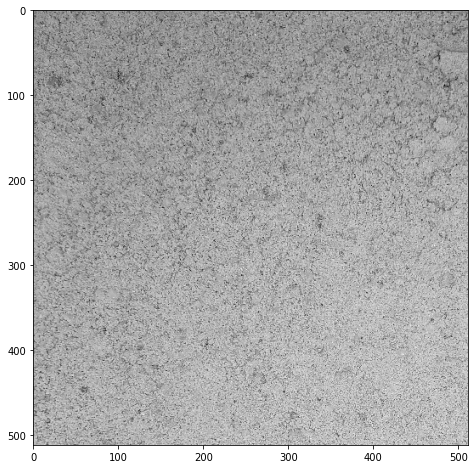

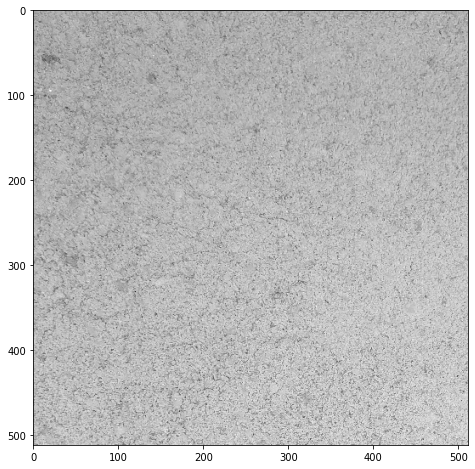

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(x_train[1].reshape(512,512), cmap="gray")

plt.figure(figsize=(8,8))
plt.imshow(x_test[0].reshape(512,512), cmap="gray")

In [9]:
"""def CLAHE(img, limit = 2.0, grid = 8):
    clahe = cv2.createCLAHE(clipLimit = limit, tileGridSize = (grid, grid))
    return clahe.apply(img)"""

'def CLAHE(img, limit = 2.0, grid = 8):\n    clahe = cv2.createCLAHE(clipLimit = limit, tileGridSize = (grid, grid))\n    return clahe.apply(img)'

## Y data onehot encoding

* ex1) 2 -> [1,0,0,0,0,0]
* ex2) 7 -> [0,0,0,0,0,1]

In [10]:
from sklearn.preprocessing import OneHotEncoder

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

enc = OneHotEncoder()
enc.fit(y_train)

y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot = enc.transform(y_test).toarray()

print(y_test_onehot)
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.4']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['FM_2.6']
 ['F

## Import keras module

In [11]:
import keras

from keras.layers import Conv2D
from keras.layers import MaxPooling2D, LeakyReLU
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

from keras.utils import multi_gpu_model

from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [12]:
inputs = Input((512, 512, 1))

# Layer 1
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(inputs)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 2
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 3
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 4
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 5
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 6
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 7
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2, name = 'last_pool')(x)

x = Flatten()(x)
x = Dense(128,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Dense(64,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
outputs = Dense(7, activation = 'softmax',kernel_initializer="glorot_normal")(x)

model = Model(inputs=[inputs], outputs=[outputs])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 128)     1280      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     147584    
__________

In [14]:
parallel_model = multi_gpu_model(model,gpus=2)

# optimizer
adam = keras.optimizers.Adam(lr=0.000001)
parallel_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [16]:
pred_y = parallel_model.predict(x_test)

pred_y = np.argmax(pred_y,axis=1 )
real_y = np.argmax(y_test_onehot,axis=1)

corr_num1 = 0
corr_num2 = 0
for i in range(real_y.shape[0]):
    if pred_y[i] == real_y[i]:
        corr_num1 += 1
        
    if abs(int(pred_y[i]) - int(real_y[i])) <= 1:
        corr_num2 += 1
        
print(corr_num1 / real_y.shape[0] * 100, "%")
print(corr_num2 / real_y.shape[0] * 100, "%")

14.527845036319611 %
29.055690072639223 %


In [17]:
parallel_model.load_weights('./minyoung_checkpoint/cp--2.5percent800--0200.ckpt')

In [18]:
pred_y = parallel_model.predict(x_test)

pred_y = np.argmax(pred_y,axis=1 )
real_y = np.argmax(y_test_onehot,axis=1)

corr_num1 = 0
corr_num2 = 0
for i in range(real_y.shape[0]):
    if pred_y[i] == real_y[i]:
        corr_num1 += 1
        
    if abs(int(pred_y[i]) - int(real_y[i])) <= 1:
        corr_num2 += 1
        
print(corr_num1 / real_y.shape[0] * 100, "%")
print(corr_num2 / real_y.shape[0] * 100, "%")

23.24455205811138 %
49.152542372881356 %


In [19]:
model.save('pre_model')

## Deep Learning Model

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train_onehot,y_val_onehot = train_test_split(x_train,y_train_onehot, test_size = 0.1, shuffle = True, random_state = 42)

- load pretrained model

In [21]:
from keras.models import load_model


pre_model = load_model("./pre_model")

/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [22]:
pre_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 128)     1280      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     147584    
__________

In [24]:
pre_model

In [28]:
last_layer = pre_model.get_layer('last_pool').output
x = Flatten()(last_layer)
x = Dense(128,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(64,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha=0.1)(x)
outputs = Dense(7, activation = 'softmax',kernel_initializer="glorot_normal")(x)

trans_model = Model(inputs = [pre_model.input], outputs=outputs)

In [29]:
trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 128)     1280      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     147584    
__________

In [30]:
len(trans_model.layers)

50

In [31]:
# Freeze conv layer
for i in range(45):
    trans_model.layers[i].trainable = False

In [33]:
# training top layer
new_model = multi_gpu_model(trans_model,gpus=2)

# optimizer
adam = keras.optimizers.Adam(lr=0.000001)
new_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = new_model.fit(x_train, y_train_onehot,\
                          epochs=200, batch_size=4,\
                          validation_data=(x_val, y_val_onehot))


Instructions for updating:
Use tf.cast instead.
Train on 1493 samples, validate on 166 samples
Epoch 1/200
1493/1493 [==============================] - 26s 18ms/step - loss: 3.7487 - acc: 0.1346 - val_loss: 2.3258 - val_acc: 0.0964
Epoch 2/200
1493/1493 [==============================] - 25s 16ms/step - loss: 2.1993 - acc: 0.1139 - val_loss: 1.9448 - val_acc: 0.1747
Epoch 3/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.9618 - acc: 0.1969 - val_loss: 1.8015 - val_acc: 0.2108
Epoch 4/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.8309 - acc: 0.2639 - val_loss: 1.7019 - val_acc: 0.3193
Epoch 5/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.7459 - acc: 0.3135 - val_loss: 1.6510 - val_acc: 0.3614
Epoch 6/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.6903 - acc: 0.3382 - val_loss: 1.6051 - val_acc: 0.3434
Epoch 7/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.65

1493/1493 [==============================] - 25s 16ms/step - loss: 1.2740 - acc: 0.5017 - val_loss: 1.2436 - val_acc: 0.5000
Epoch 59/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.2721 - acc: 0.5023 - val_loss: 1.2472 - val_acc: 0.5181
Epoch 60/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.2725 - acc: 0.5124 - val_loss: 1.2387 - val_acc: 0.4880
Epoch 61/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.2688 - acc: 0.5077 - val_loss: 1.2427 - val_acc: 0.5301
Epoch 62/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.2649 - acc: 0.5104 - val_loss: 1.2475 - val_acc: 0.5422
Epoch 63/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.2635 - acc: 0.5124 - val_loss: 1.2370 - val_acc: 0.5422
Epoch 64/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.2611 - acc: 0.5030 - val_loss: 1.2417 - val_acc: 0.5060
Epoch 65/200
1493/1493 [=======================

1493/1493 [==============================] - 25s 16ms/step - loss: 1.1607 - acc: 0.5492 - val_loss: 1.1700 - val_acc: 0.5181
Epoch 118/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.1586 - acc: 0.5512 - val_loss: 1.1794 - val_acc: 0.5060
Epoch 119/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.1599 - acc: 0.5506 - val_loss: 1.1754 - val_acc: 0.5181
Epoch 120/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.1555 - acc: 0.5579 - val_loss: 1.1673 - val_acc: 0.5241
Epoch 121/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.1562 - acc: 0.5425 - val_loss: 1.1750 - val_acc: 0.5301
Epoch 122/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.1541 - acc: 0.5640 - val_loss: 1.1689 - val_acc: 0.5241
Epoch 123/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.1507 - acc: 0.5506 - val_loss: 1.1758 - val_acc: 0.5120
Epoch 124/200
1493/1493 [================

1493/1493 [==============================] - 25s 16ms/step - loss: 1.0918 - acc: 0.5908 - val_loss: 1.1195 - val_acc: 0.5422
Epoch 177/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.0927 - acc: 0.5874 - val_loss: 1.1225 - val_acc: 0.5663
Epoch 178/200
1493/1493 [==============================] - 25s 17ms/step - loss: 1.0906 - acc: 0.5901 - val_loss: 1.1152 - val_acc: 0.5361
Epoch 179/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.0890 - acc: 0.5894 - val_loss: 1.1259 - val_acc: 0.5482
Epoch 180/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.0884 - acc: 0.5921 - val_loss: 1.1254 - val_acc: 0.5301
Epoch 181/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.0882 - acc: 0.5874 - val_loss: 1.1183 - val_acc: 0.5422
Epoch 182/200
1493/1493 [==============================] - 25s 16ms/step - loss: 1.0873 - acc: 0.5887 - val_loss: 1.1247 - val_acc: 0.5241
Epoch 183/200
1493/1493 [================

NameError: name 'hist' is not defined

<Figure size 1440x864 with 0 Axes>

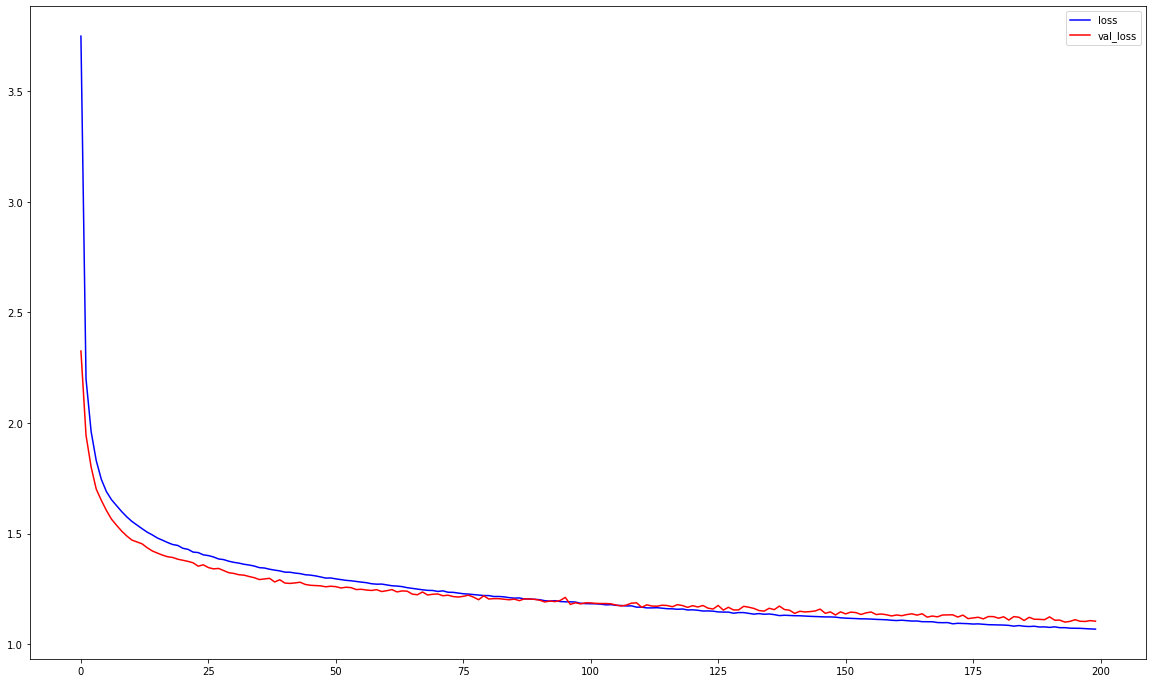

In [35]:
# plot loss & val_loss
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
#plt.xticks(np.arange(0,50,1))
plt.legend(loc="upper right");

# Fine Tuning

In [40]:
# Freeze conv layer
for i in range(len(trans_model.layers)):
    trans_model.layers[i].trainable = True


In [41]:
trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 128)     1280      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     147584    
__________

In [42]:
#early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', verbose = 0, patience = 20, mode = 'auto')

#checkpoint
checkpoint_path = './minyoung_checkpoint/5%_finetuning_{epoch:04d}.ckpt'
cp_dir = os.path.dirname(checkpoint_path)
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, \
                                                    save_weights_only = True, verbose = 1, period = 20)

new_model = multi_gpu_model(trans_model,gpus=2)

# optimizer
adam = keras.optimizers.Adam(lr=0.000001)
new_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = new_model.fit(x_train, y_train_onehot,\
                          epochs=1000, batch_size=4,\
                          validation_data=(x_val, y_val_onehot),\
                          callbacks = [early_stopping, checkpoint])


Train on 1493 samples, validate on 166 samples
Epoch 1/1000
1493/1493 [==============================] - 44s 30ms/step - loss: 1.0980 - acc: 0.5820 - val_loss: 1.0937 - val_acc: 0.5964
Epoch 2/1000
1493/1493 [==============================] - 41s 28ms/step - loss: 1.0759 - acc: 0.6021 - val_loss: 1.0892 - val_acc: 0.5723
Epoch 3/1000
1493/1493 [==============================] - 41s 28ms/step - loss: 1.0743 - acc: 0.5995 - val_loss: 1.0357 - val_acc: 0.6024
Epoch 4/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 1.0328 - acc: 0.6115 - val_loss: 1.0205 - val_acc: 0.6084
Epoch 5/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 1.0185 - acc: 0.6249 - val_loss: 1.0046 - val_acc: 0.6386
Epoch 6/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 1.0141 - acc: 0.6182 - val_loss: 0.9825 - val_acc: 0.6205
Epoch 7/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.9979 - acc: 0.6356 - val_loss: 1.0099 - val

1493/1493 [==============================] - 42s 28ms/step - loss: 0.6219 - acc: 0.7716 - val_loss: 0.6586 - val_acc: 0.7169
Epoch 58/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.6245 - acc: 0.7749 - val_loss: 0.7301 - val_acc: 0.6988
Epoch 59/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.6321 - acc: 0.7669 - val_loss: 0.6528 - val_acc: 0.7771
Epoch 60/1000
1492/1493 [============================>.] - ETA: 0s - loss: 0.6082 - acc: 0.7808
Epoch 00060: saving model to ./minyoung_checkpoint/5%_finetuning_0060.ckpt
1493/1493 [==============================] - 43s 29ms/step - loss: 0.6079 - acc: 0.7810 - val_loss: 0.6226 - val_acc: 0.7289
Epoch 61/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.6160 - acc: 0.7729 - val_loss: 0.5952 - val_acc: 0.7831
Epoch 62/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.6087 - acc: 0.7810 - val_loss: 0.6456 - val_acc: 0.7530
Epoch 63/1000
1493/1493

1493/1493 [==============================] - 42s 28ms/step - loss: 0.4250 - acc: 0.8419 - val_loss: 0.4292 - val_acc: 0.8253
Epoch 113/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.4074 - acc: 0.8486 - val_loss: 0.4578 - val_acc: 0.7952
Epoch 114/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.4134 - acc: 0.8587 - val_loss: 0.4538 - val_acc: 0.8072
Epoch 115/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.4468 - acc: 0.8419 - val_loss: 0.9029 - val_acc: 0.6747
Epoch 116/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.4096 - acc: 0.8553 - val_loss: 0.4878 - val_acc: 0.8193
Epoch 117/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.4199 - acc: 0.8439 - val_loss: 0.4617 - val_acc: 0.7892
Epoch 118/1000
1493/1493 [==============================] - 42s 28ms/step - loss: 0.4146 - acc: 0.8513 - val_loss: 0.7715 - val_acc: 0.7169
Epoch 119/1000
1493/1493 [=========

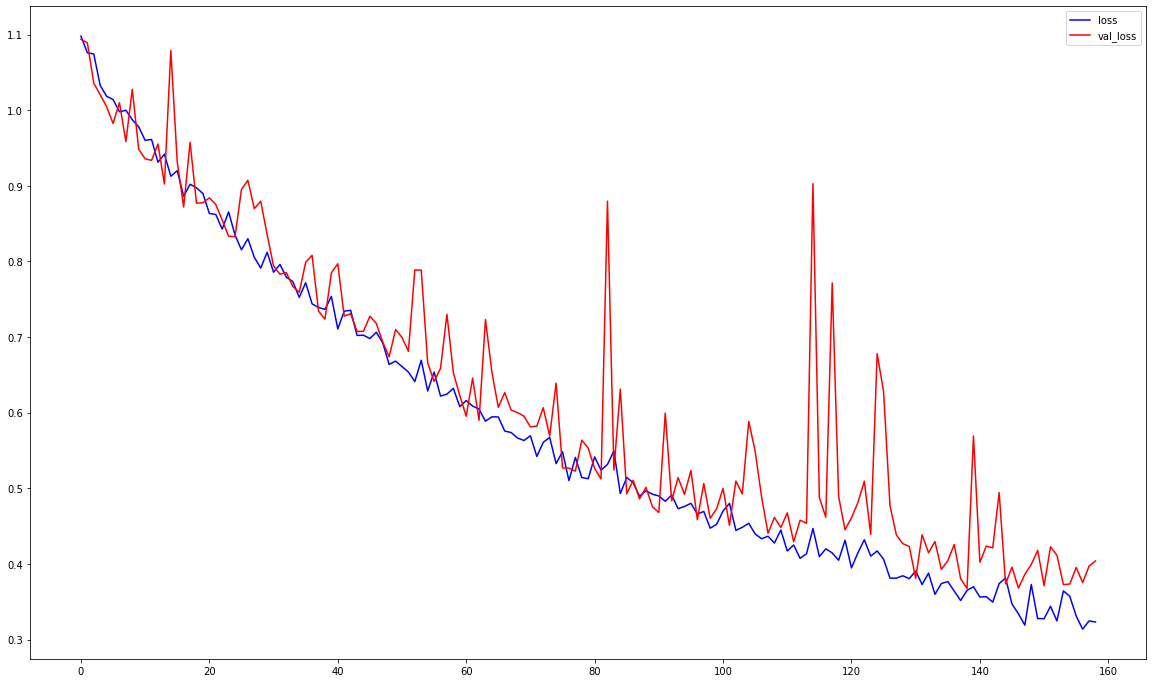

In [43]:
# plot loss & val_loss
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
#plt.xticks(np.arange(0,50,1))
plt.legend(loc="upper right");

## Predict

In [44]:
pred_y = new_model.predict(x_test)


In [45]:
y_test_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [46]:
pred_y = np.argmax(pred_y,axis=1 )
real_y = np.argmax(y_test_onehot,axis=1)

print(pred_y)
print(real_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 4 1 1 1 6 4 1 1 1 1 1 1 1 1 1 2 1 1 4
 4 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 4
 4 3 2 2 2 2 4 5 2 2 2 2 2 2 5 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 3
 4 2 3 3 3 3 3 3 3 3 3 2 2 4 2 3 3 3 3 3 3 2 3 3 2 4 3 3 1 1 4 3 3 3 3 2 2
 3 3 2 3 4 4 3 2 3 4 3 4 2 3 3 2 3 4 2 4 4 4 4 2 2 4 4 4 4 4 4 1 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 5 1 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 6 3
 4 5 5 5 5 6 5 5 5 5 5 5 4 4 4 5 5 4 5 6 6 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 6 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 

In [47]:
corr_num1 = 0
corr_num2 = 0
for i in range(real_y.shape[0]):
    if pred_y[i] == real_y[i]:
        corr_num1 += 1
        
    if abs(int(pred_y[i]) - int(real_y[i])) <= 1:
        corr_num2 += 1
        
print(corr_num1 / real_y.shape[0] * 100, "%")
print(corr_num2 / real_y.shape[0] * 100, "%")

84.7457627118644 %
94.67312348668281 %


## Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(pred_y, real_y)

['2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.61']


<AxesSubplot:>

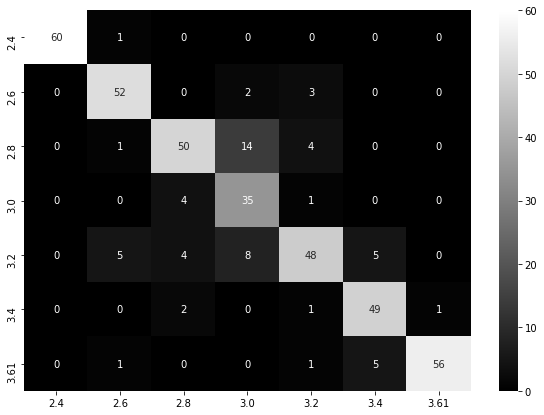

In [49]:
import seaborn as sn
import pandas as pd


cm_list = []
for one_folder in folder_list:
    splited_folder = one_folder.split("_")
    cm_list.append(splited_folder[1])
    cm_list = set(cm_list)
    cm_list = list(cm_list)
    cm_list.sort()
print(cm_list)
df_cm = pd.DataFrame(conf_mat, index = [i for i in cm_list],
                  columns = [i for i in cm_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="gray")

<AxesSubplot:>

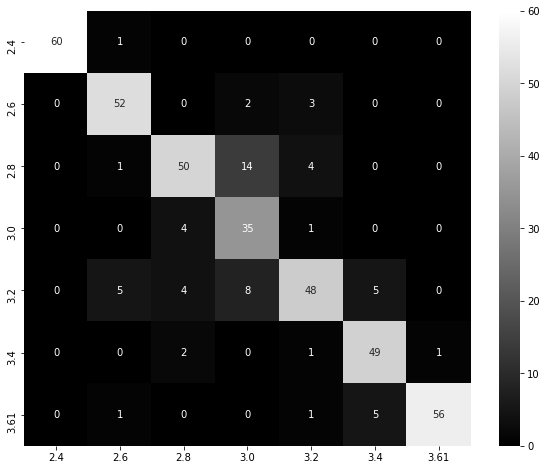

In [50]:
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True, cmap="gray", fmt="g")

In [53]:
trans_model.save("5%model_transfer")

In [54]:
m = load_model('5%model_transfer')

/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [55]:
pred_y = m.predict(x_test)

pred_y = np.argmax(pred_y,axis=1 )
real_y = np.argmax(y_test_onehot,axis=1)

corr_num1 = 0
corr_num2 = 0
for i in range(real_y.shape[0]):
    if pred_y[i] == real_y[i]:
        corr_num1 += 1
        
    if abs(int(pred_y[i]) - int(real_y[i])) <= 1:
        corr_num2 += 1
        
print(corr_num1 / real_y.shape[0] * 100, "%")
print(corr_num2 / real_y.shape[0] * 100, "%")

84.7457627118644 %
94.67312348668281 %
